# Measurement comparison

### Get one month of data for a ground station

In this case we will use SQL to get the data from the gorund stations. First, we import all packages

In [1]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import os
import adampy as adam

In this case we have to connect to the database containing the data. With Python this is really easy:

In [2]:
conn = psycopg2.connect(dbname='ground_measurements', user='topro', password='#top2019', host='80.158.2.100', port='5432', sslmode='require')

Once the connection is done, we define the query that will get all the data we need.

In [3]:
cur = conn.cursor()

query = """SELECT * FROM measurements 
INNER JOIN stations ON measurements.stations_id = stations.id 
INNER JOIN products ON measurements.observed_field = products.id 
WHERE stations.name = 'AT9GAUD' 
AND measurements.observation_time_start >'2019-04-01 00:00:00+01' 
AND measurements.observation_time_start <'2019-04-02 00:00:00+01' 
AND products.product = 'PM10';"""

In order to visualize the data we choose Pandas as it can read directly data form a database connection.

In [4]:
df = pd.read_sql_query(query, conn)
df

,id,stations_id,observation_time_start,observation_time_end,observed_field,value,id,name,latitude,longitude,height,id,product,measurement_unit,other_info
0,01100320190002155_NET.09,11,2019-04-01 00:00:00+00:00,2019-04-01 01:00:00+00:00,3,34.991,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
1,01100320190002156_NET.09,11,2019-04-01 01:00:00+00:00,2019-04-01 02:00:00+00:00,3,32.196,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
2,01100320190002157_NET.09,11,2019-04-01 02:00:00+00:00,2019-04-01 03:00:00+00:00,3,27.937,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
3,01100320190002158_NET.09,11,2019-04-01 03:00:00+00:00,2019-04-01 04:00:00+00:00,3,22.348,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
4,01100320190002159_NET.09,11,2019-04-01 04:00:00+00:00,2019-04-01 05:00:00+00:00,3,21.745,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
5,01100320190002160_NET.09,11,2019-04-01 05:00:00+00:00,2019-04-01 06:00:00+00:00,3,23.110,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
6,01100320190002162_NET.09,11,2019-04-01 06:00:00+00:00,2019-04-01 07:00:00+00:00,3,26.072,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
7,01100320190002163_NET.09,11,2019-04-01 07:00:00+00:00,2019-04-01 08:00:00+00:00,3,26.950,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
8,01100320190002185_NET.09,11,2019-04-01 18:00:00+00:00,2019-04-01 19:00:00+00:00,3,22.570,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None
9,01100320190002164_NET.09,11,2019-04-01 08:00:00+00:00,2019-04-01 09:00:00+00:00,3,32.061,11,AT9GAUD,48.19,16.34,179.0,3,PM10,µg/m3,None


Pandas also allow us to plot the data by just selecting the column names

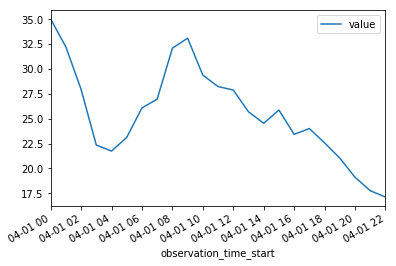

In [5]:
ax = plt.gca()
df.plot(kind='line',x='observation_time_start',y='value',ax=ax)

Finally we close all connections to the database

In [6]:
cur.close()
conn.close()

Then we collect the CAMS data so we can compare the measurements.


In [8]:
lat = df.latitude[0]
long = df.longitude[0]
collection = 'EU_CAMS_SURFACE_PM10_G'
time_t = '2019-04-01T00:00:00,2019-04-02T00:59:59'

data, times = adam.getTimeSeries('wcs.top-platform.eu', collection,time_t, lat, long).get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-04-01T00:00:00,2019-04-02T00:59:59)&format=application/xml&CoverageId=EU_CAMS_SURFACE_PM10_G&subset=Lat(48.19)&subset=Long(16.34)&filter=false&token=None


And plot the results for comparison

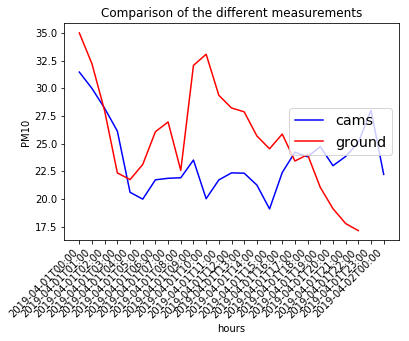

In [9]:
fig, ax = plt.subplots()
ax.plot(times, data, label='cams', color='blue')
ax.plot(times[:-2], df.value, label='ground', color = 'red')
legend = ax.legend(loc='center right', fontsize='x-large')
ax.set_xticklabels(labels=times, rotation=45, ha='right')

plt.xlabel('hours')
plt.ylabel('PM10')
plt.title('Comparison of the different measurements')
plt.show()

# Regional vs. Global CAMS 

In [10]:
#define bbox
max_lat = 60
min_lat = 40

max_long = 30
min_long = 0

#collection = 'Z_CAMS_C_ECMF_TCNO2'
#collection = 'Z_CAMS_C_ECMF_TCSO2'
#collection = 'Z_CAMS_C_ECMF_GTCO3'
collection = 'Z_CAMS_C_ECMF_PM10'
time_t = '2019-06-01T00:00:00,2019-06-01T00:59:59'

image_glob, metadata_glob = adam.getImage('wcs.top-platform.eu', collection,time_t, min_lat, max_lat, min_long, max_long).get_data()

In [11]:
max_lat = 60
min_lat = 40

max_long = 30
min_long = 0
#collection = 'EU_CAMS_SURFACE_NO2_G'
#collection = 'EU_CAMS_SURFACE_SO2_G'
#collection = 'EU_CAMS_SURFACE_O3_G'
collection = 'EU_CAMS_SURFACE_PM10_G'
time_t = '2019-06-01T00:00:00,2019-06-01T00:59:59'

image_eu, metadata_eu = adam.getImage('wcs.top-platform.eu', collection,time_t, min_lat, max_lat, min_long, max_long).get_data()

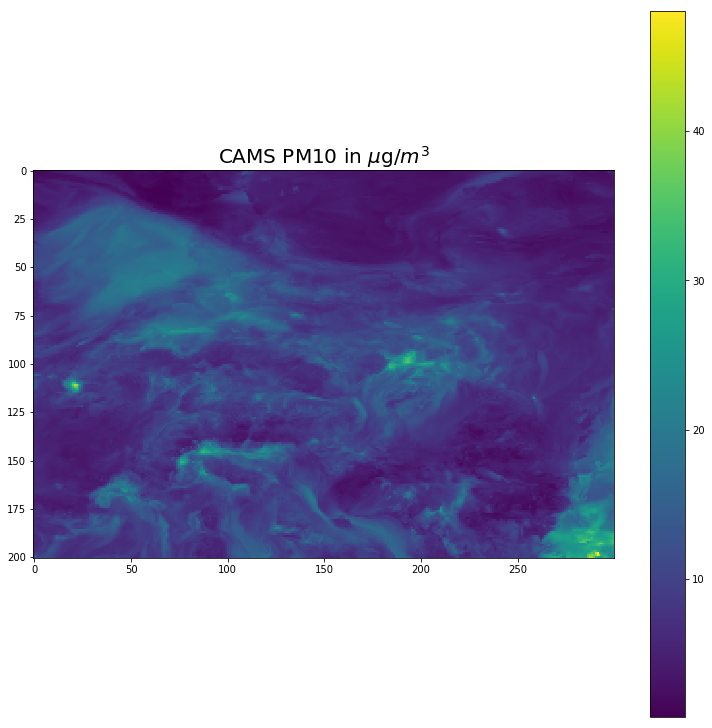

In [14]:
plt.subplots(figsize=(13,13))
if collection == 'EU_CAMS_SURFACE_PM10_G':
    plt.imshow(image_eu)
    plt.colorbar()
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-2]), size=20)
else:
    plt.imshow(image_eu)
    plt.colorbar()
    plt.title(r'CAMS {} in kg/$m^3$'.format(collection.split('_')[-2]), size=20)

Text(0.5, 1.0, 'CAMS PM10 in $\\mu/m^3$')

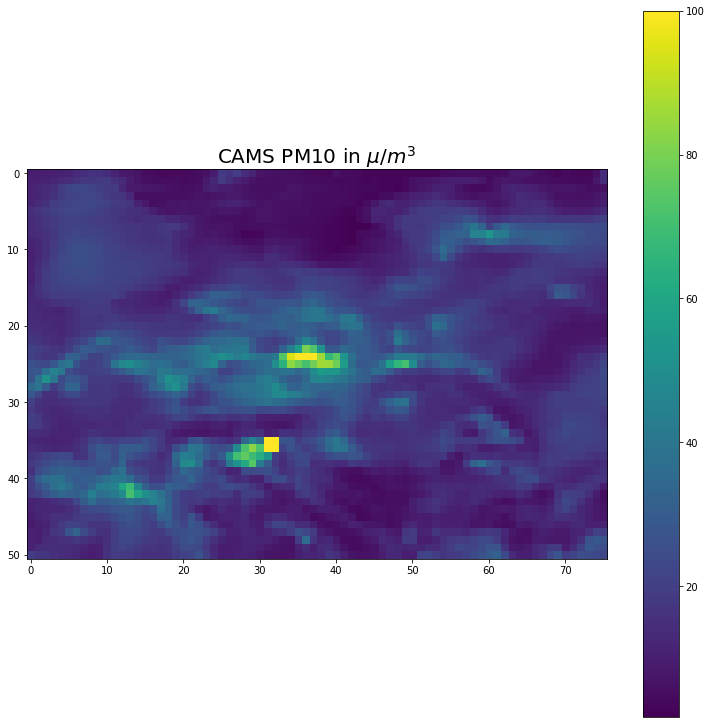

In [15]:
plt.subplots(figsize=(13,13))
plt.imshow(image_glob, vmax = 100)
plt.colorbar()
plt.title(r'CAMS {} in $\mu/m^3$'.format(collection.split('_')[-2]), size=20)

# Exercise

* Try selecting a different station and compare the measurements